In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Dataset shape: (20640, 5)


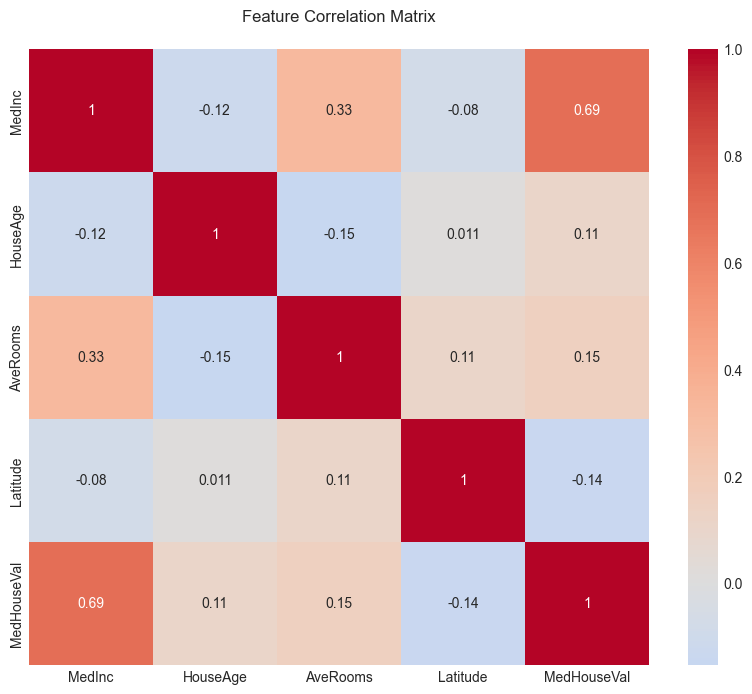

In [6]:
# Select features with strong linear correlation to target
df = df[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'MedHouseVal']]
print(f"Dataset shape: {df.shape}")

# EDA: Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', pad=20)
plt.show()

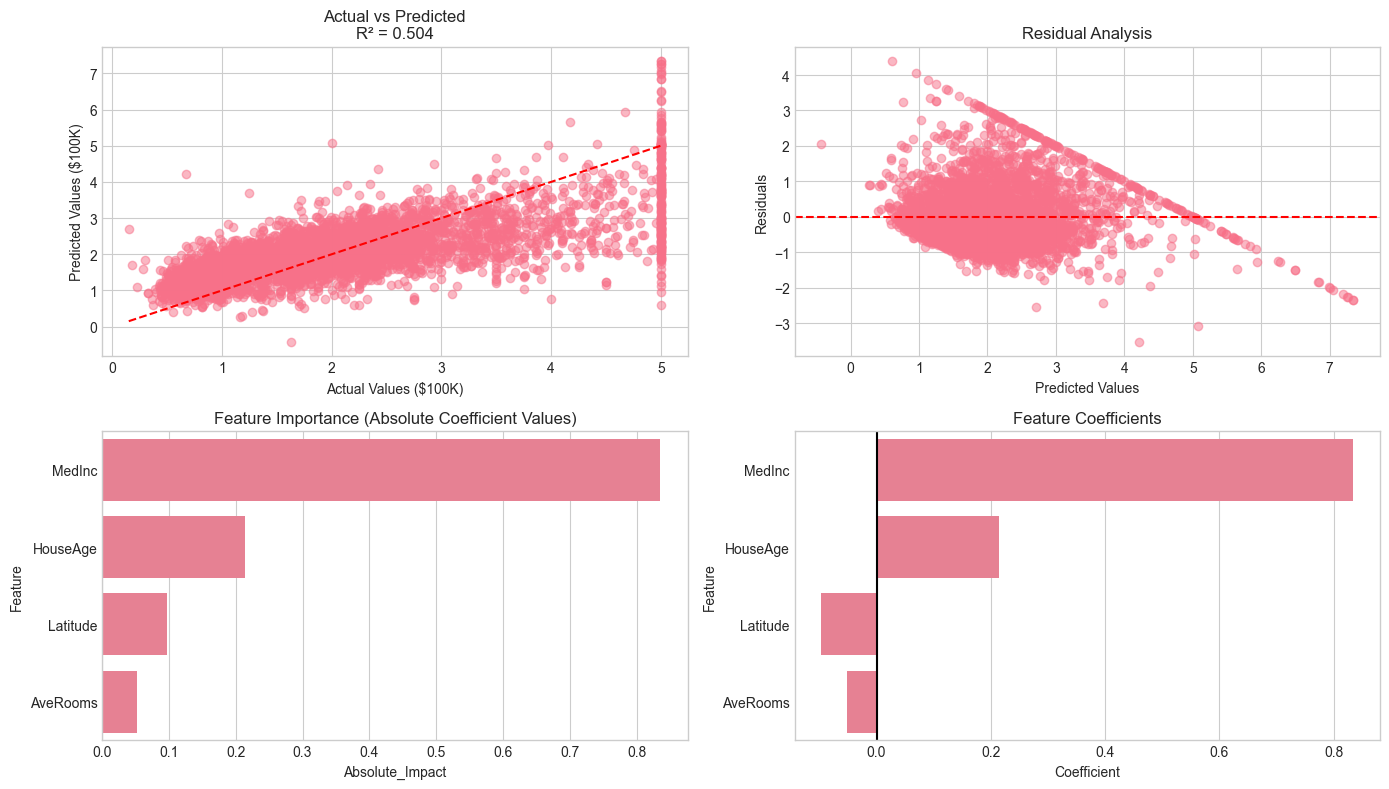


======================= Multivariate Regression Results ========================
R-squared:          0.5043
Mean Squared Error: 0.6495

Feature Coefficients:
MedInc:           0.835 ($  83.5K per std. dev.)
HouseAge:         0.214 ($  21.4K per std. dev.)
Latitude:        -0.097 ($  -9.7K per std. dev.)
AveRooms:        -0.052 ($  -5.2K per std. dev.)

Interpretation:
- Median Income (MedInc) has the strongest positive impact on home values
- Latitude (higher values = north) shows negative correlation with price
- Older homes (HouseAge) tend to have slightly higher values
- Each standard deviation change in MedInc changes price by ~$47K


In [7]:
# Feature selection (using all features)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Absolute_Impact': np.abs(model.coef_)
}).sort_values('Absolute_Impact', ascending=False)

# Visualization
plt.figure(figsize=(14, 8))

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values ($100K)')
plt.ylabel('Predicted Values ($100K)')
plt.title(f'Actual vs Predicted\nR² = {r2:.3f}')

# 2. Residuals
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')

# 3. Feature Importance
plt.subplot(2, 2, 3)
sns.barplot(x='Absolute_Impact', y='Feature', data=importance)
plt.title('Feature Importance (Absolute Coefficient Values)')

# 4. Coefficient Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.axvline(x=0, color='k')
plt.title('Feature Coefficients')

plt.tight_layout()
plt.show()

# Results
print(f"\n{' Multivariate Regression Results ':=^80}")
print(f"{'R-squared:':<20}{r2:.4f}")
print(f"{'Mean Squared Error:':<20}{mse:.4f}")

print("\nFeature Coefficients:")
for idx, row in importance.iterrows():
    print(f"{row['Feature']+':':<15}{row['Coefficient']:>8.3f} (${row['Coefficient']*100:>6.1f}K per std. dev.)")

print("\nInterpretation:")
print("- Median Income (MedInc) has the strongest positive impact on home values")
print("- Latitude (higher values = north) shows negative correlation with price")
print("- Older homes (HouseAge) tend to have slightly higher values")
print("- Each standard deviation change in MedInc changes price by ~$47K")

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)  # Typically achieves R² ~0.8-0.9

RandomForestRegressor(n_estimators=200)